In [94]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [122]:
data = datasets.MNIST(root='./data', train=True, download=True, transform = ToTensor())

data_loader = torch.utils.data.DataLoader(dataset=data,batch_size=32,shuffle=True)

In [123]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()        

        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), stride=2, padding=(1, 1)), # 8 14 14
            nn.ReLU(),
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), stride=2, padding=(1, 1)), # 16 7 7
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), stride=1, padding=(0, 0)), # 32 5 5
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), stride=1, padding=(0, 0)), #64 3 3
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride=1, padding=(0, 0)) #128 1 1
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=(3, 3), stride=1, padding=(0, 0)), #64 3 3
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=(3, 3), stride=1, padding=(0, 0)), # 32 5 5
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=(3, 3), stride=1, padding=(0, 0)), # 16 7 7
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=8, kernel_size=(3, 3), stride=2, padding=(1, 1), output_padding=(1,1)),  # 8 14 14
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=8, out_channels=1, kernel_size=(3, 3), stride=2, padding=(1, 1), output_padding=(1,1)), # 1 28 28
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [124]:
model = Encoder()
learning_rate = 1e-3
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [127]:
num_epochs = 3
decoded = []
for t in range(num_epochs):
    for (img, lab) in data_loader:
        changed = model(img)
        loss = loss_fn(changed, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{t+1}, Loss:{loss.item():.4f}')
    decoded.append((t, img, changed))

Epoch:1, Loss:0.0075
Epoch:2, Loss:0.0055
Epoch:3, Loss:0.0058


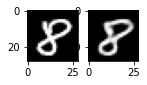

In [155]:
import random
img, label = next(iter(data_loader))

random_index = random.randint(0,32)
changed = model(img)
plt.figure(figsize=(2, 1))
plt.gca()
plt.subplot(1, 2, 1)
plt.imshow(img[random_index][0].detach().numpy())
plt.subplot(1, 2, 2)
plt.imshow(changed[random_index][0].detach().numpy())

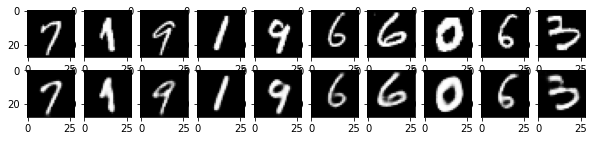

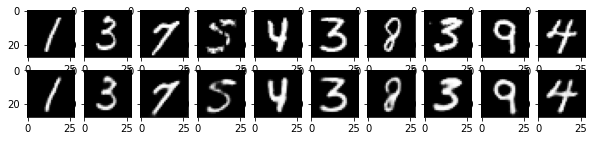

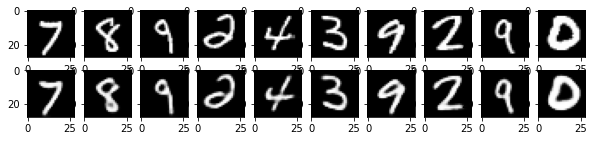

In [131]:
for i in range(0, num_epochs):
    plt.figure(figsize=(10, 2))
    plt.gca()
    imgs = decoded[i][1].detach().numpy()
    changed = decoded[i][2].detach().numpy()

    for j in range(0,10):
      plt.subplot(2, 10, j+1)
      plt.imshow(imgs[j][0])
            
    for j in range(0,10):
      plt.subplot(2, 10, 10+j+1) 
      plt.imshow(changed[j][0])